Import Library dan modul

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

1. Data Gathering

In [189]:
# Mengambil data dari file CSV
df = pd.read_csv('data_assignment05.csv')
display(df)

,Feature1,Feature2,Feature3,Featuer4
0,2.248357,1.930868,2.323844,3.546060
1,1.882923,1.882932,2.789606,2.034869
2,1.765263,2.271280,1.768291,-0.431460
3,2.120981,1.043360,1.137541,-0.624575
4,1.493584,2.157124,1.545988,-2.324607
...,...,...,...,...
145,10.169248,9.792356,10.316391,5.041386
146,10.090933,10.124110,9.770320,-1.199689
147,10.415168,9.571958,10.035783,-0.455315
148,10.239490,10.166831,10.518770,-0.520033


2. Data Preprocessing (Exploration dan Cleaning)

In [190]:
# Menampilkan informasi dasar tentang dataset
df.head()

,Feature1,Feature2,Feature3,Featuer4
0,2.248357,1.930868,2.323844,3.546060
1,1.882923,1.882932,2.789606,2.034869
2,1.765263,2.271280,1.768291,-0.431460
3,2.120981,1.043360,1.137541,-0.624575
4,1.493584,2.157124,1.545988,-2.324607


In [191]:
# Menampilkan ukuran dataset
df.shape

(150, 4)

In [192]:
# Menampilkan deskripsi statistik dari dataset
display(df.describe())

,Feature1,Feature2,Feature3,Featuer4
count,150.000000,150.000000,150.000000,150.000000
mean,5.995264,5.986198,5.993952,0.490192
std,3.325348,3.280862,3.330017,1.970220
min,1.260739,1.020165,0.690127,-4.103842
25%,2.153997,2.241846,2.258425,-1.025265
50%,6.043200,5.987677,6.138969,0.533596
75%,9.661465,9.547436,9.664050,2.009053
max,11.030374,11.037700,11.539440,5.940338


In [193]:
# Menampilkan informasi DataFrame
print("\n Menampilkan informasi DataFrame:\n")
df.info()


 Menampilkan informasi DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  150 non-null    float64
 1   Feature2  150 non-null    float64
 2   Feature3  150 non-null    float64
 3   Featuer4  150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


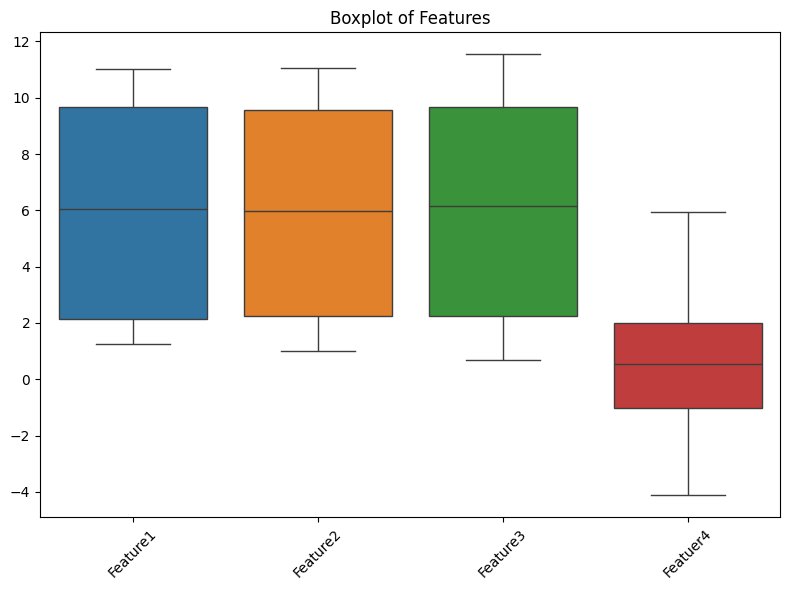

In [194]:
# buatkan boxplot tiap kolom
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [195]:
# Mengubah nama kolom yang tidak sesuai
print("\nMengganti nama kolom yang tidak sesuai (typo):")
df.columns = df.columns.str.strip()
if 'Featuer4' in df.columns:
    df.rename(columns={'Featuer4': 'Feature4'}, inplace=True)
    print("Mengganti nama 'Featuer4' menjadi 'Feature4'.")
else:
    print("Tidak ada perubahan nama kolom.")



Mengganti nama kolom yang tidak sesuai (typo):
Mengganti nama 'Featuer4' menjadi 'Feature4'.


In [196]:
# cek missing value dan nan value
print("\nCek missing values dan nan values:")
print(df.isnull().sum())
print(df.isna().sum())


Cek missing values dan nan values:
Feature1    0
Feature2    0
Feature3    0
Feature4    0
dtype: int64
Feature1    0
Feature2    0
Feature3    0
Feature4    0
dtype: int64


In [197]:
# Menampilkan DataFrame setelah konversi
print("DataFrame setelah ganti nama kolom, cek missing values dan nan values:")
df.info()

DataFrame setelah ganti nama kolom, cek missing values dan nan values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  150 non-null    float64
 1   Feature2  150 non-null    float64
 2   Feature3  150 non-null    float64
 3   Feature4  150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [198]:
# Menampilkan deskripsi statistik setelah preprocessing
display(df.describe())  
display(df.head())

,Feature1,Feature2,Feature3,Feature4
count,150.000000,150.000000,150.000000,150.000000
mean,5.995264,5.986198,5.993952,0.490192
std,3.325348,3.280862,3.330017,1.970220
min,1.260739,1.020165,0.690127,-4.103842
25%,2.153997,2.241846,2.258425,-1.025265
50%,6.043200,5.987677,6.138969,0.533596
75%,9.661465,9.547436,9.664050,2.009053
max,11.030374,11.037700,11.539440,5.940338


,Feature1,Feature2,Feature3,Feature4
0,2.248357,1.930868,2.323844,3.546060
1,1.882923,1.882932,2.789606,2.034869
2,1.765263,2.271280,1.768291,-0.431460
3,2.120981,1.043360,1.137541,-0.624575
4,1.493584,2.157124,1.545988,-2.324607


Data Model

In [199]:
# Standarisasi data sebelum mencari K
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Menampilkan deskripsi data setelah standarisasi
print("\nDeskripsi data setelah standarisasi:")
display(pd.DataFrame(X, columns=df.columns).describe())


Deskripsi data setelah standarisasi:


,Feature1,Feature2,Feature3,Feature4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.421085e-16,-1.421085e-16,-1.421085e-16,-4.144833e-17
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.428538e+00,-1.518707e+00,-1.598068e+00,-2.339549e+00
25%,-1.159017e+00,-1.145094e+00,-1.125532e+00,-7.717584e-01
50%,1.446366e-02,4.523639e-04,4.369428e-02,2.210390e-02
75%,1.106195e+00,1.089094e+00,1.105818e+00,7.734922e-01
max,1.519233e+00,1.544846e+00,1.670883e+00,2.775530e+00


- Elbow Method

K=1, Inertia=600.0000
K=2, Inertia=274.1173
K=3, Inertia=198.8236
K=4, Inertia=126.6512
K=5, Inertia=87.5137
K=6, Inertia=79.5246
K=7, Inertia=48.6906
K=8, Inertia=38.0401
K=9, Inertia=34.8625
K=10, Inertia=33.1653


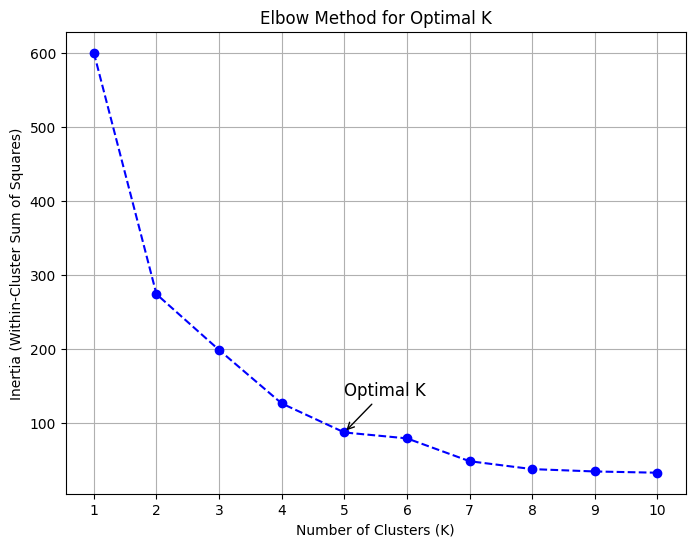

Dari grafik Elbow Method, terlihat bahwa jumlah cluster optimal adalah 5, 
karena setelah itu penurunan WCSS mulai melambat.


In [200]:
# Melakukan elbow method
k_values = range(1, 11)  # Test K from 1 to 10
inertia_values = []

# Kalkulasikan inertia untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_:.4f}")

# Plot grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', color='b')

# Tambahkan anotasi pada elbow point
plt.annotate('Optimal K', xy=(5, inertia_values[4]), xytext=(5, inertia_values[4] + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_values)
plt.grid()
plt.show()

print("Dari grafik Elbow Method, terlihat bahwa jumlah cluster optimal adalah 5, \nkarena setelah itu penurunan WCSS mulai melambat.")

- Silhouette Score

K=2, Silhouette Score=0.4809
K=3, Silhouette Score=0.4014
K=4, Silhouette Score=0.4792
K=5, Silhouette Score=0.5070
K=6, Silhouette Score=0.4747
K=7, Silhouette Score=0.4757
K=8, Silhouette Score=0.4773
K=9, Silhouette Score=0.4581
K=10, Silhouette Score=0.4432


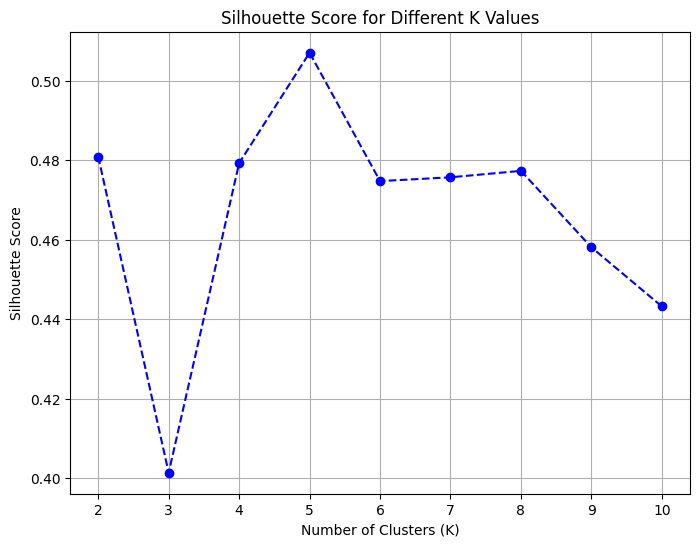

The optimal number of clusters is K=5


In [201]:
# Melakukan Silhouette Score
k_values = range(2, 11)  # Test K from 2 to 10
silhouette_scores = []

# Kalkulasikan Silhouette Score untuk setiap nilai K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Plot grafik Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Menentukan K optimal berdasarkan Silhouette Score
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is K={optimal_k}")


- Gap Statistic

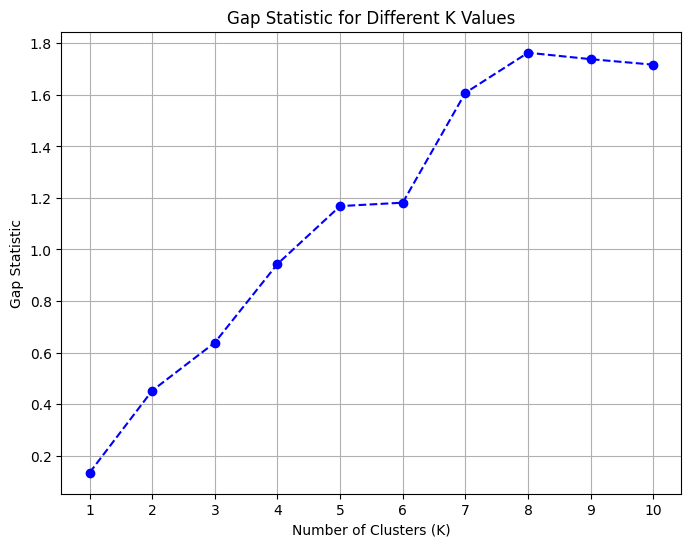

The optimal number of clusters is K=5


In [202]:
from sklearn.metrics import pairwise_distances_argmin_min

# Fungsi untuk menghitung Gap Statistic
def calculate_gap_statistic(X, k_max=10, n_references=10, random_state=42):
    """
    Calculate the Gap Statistic for KMeans clustering.

    Parameters:
    - X: Dataset (numpy array)
    - k_max: Maximum number of clusters to test
    - n_references: Number of reference datasets to generate
    - random_state: Random seed for reproducibility

    Returns:
    - optimal_k: Optimal number of clusters
    - gaps: Gap values for each K
    """
    np.random.seed(random_state)
    gaps = []
    deviations = []
    reference_inertia = []

    # Iterasi untuk setiap nilai K
    for k in range(1, k_max + 1):
        # Fit KMeans to the actual data
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(X)
        actual_inertia = kmeans.inertia_

        # kalkulasikan inertia untuk referensi
        ref_inertia = []
        for _ in range(n_references):
            random_data = np.random.uniform(X.min(axis=0), X.max(axis=0), X.shape)
            kmeans_ref = KMeans(n_clusters=k, random_state=random_state)
            kmeans_ref.fit(random_data)
            ref_inertia.append(kmeans_ref.inertia_)

        # Kalkulasi Gap Statistic
        ref_inertia_mean = np.mean(ref_inertia)
        gap = np.log(ref_inertia_mean) - np.log(actual_inertia)
        gaps.append(gap)
        deviations.append(np.std(np.log(ref_inertia)) * np.sqrt(1 + 1 / n_references))

    # Menentukan K optimal berdasarkan Gap Statistic
    optimal_k = np.argmax(np.array(gaps)[:-1] >= (np.array(gaps)[1:] - np.array(deviations)[1:])) + 1

    return optimal_k, gaps

# Menentukan Gap Statistic
k_max = 10
optimal_k, gaps = calculate_gap_statistic(X, k_max=k_max)

# Plot grafik Gap Statistic
plt.figure(figsize=(8, 6))
plt.plot(range(1, k_max + 1), gaps, marker='o', linestyle='--', color='b')
plt.title('Gap Statistic for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Gap Statistic')
plt.xticks(range(1, k_max + 1))
plt.grid()
plt.show()

print(f"The optimal number of clusters is K={optimal_k}")



PCA

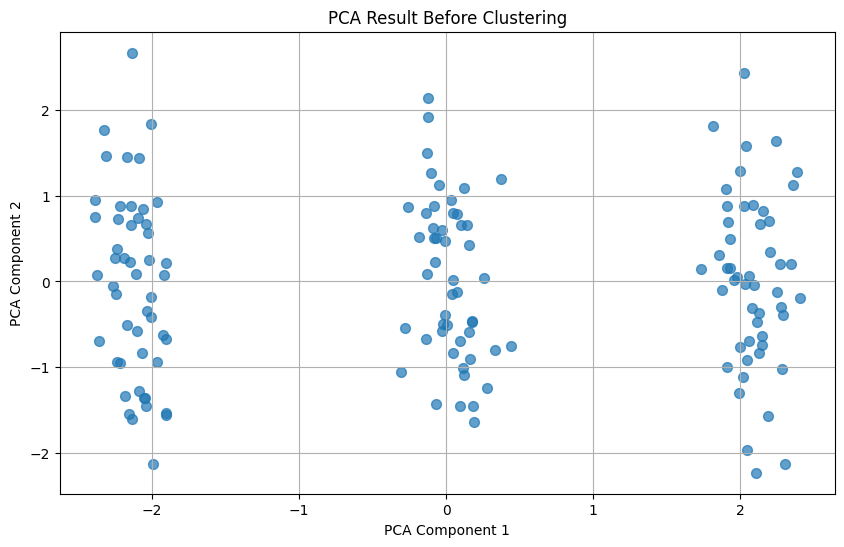

In [203]:
# Visualisasi data sebelum clustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

# plot grafik sebelum data PCA
plt.figure(figsize=(10, 6))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=50, alpha=0.7)
plt.title('PCA Result Before Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

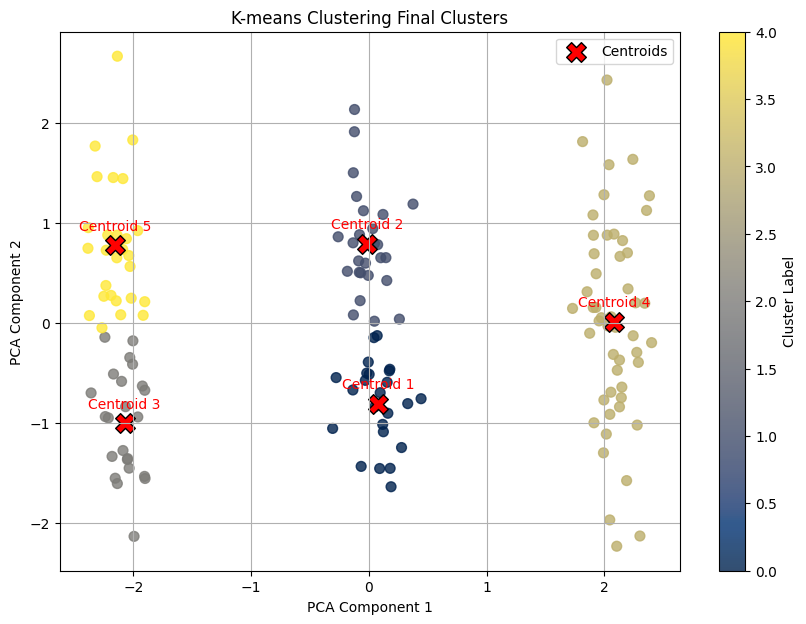

In [204]:
# Definisikan fungsi plot_clusters
def plot_clusters(data, labels, centroids, iteration=None, title_suffix=""):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data) # Mengimplementasikan PCA untuk mengurangi dimensi data ke 2D
    centroids_2d = pca.transform(centroids) # Centroids juga harus diubah ke 2D

    # Plotting gambar 2D clusters
    plt.figure(figsize=(10, 7))
    if iteration is not None:
        plt.title(f'K-means Clustering Iteration {iteration} {title_suffix}')
    else:
        plt.title(f'K-means Clustering {title_suffix}')
    scatter = plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels, cmap='cividis', s=50, alpha=0.8)
    # Plot centroids
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], marker='X', s=200, c='red', edgecolor='black', linewidth=1, label='Centroids')
    # Tambahkan label pada centroid
    for i, centroid in enumerate(centroids_2d):
        plt.text(centroid[0], centroid[1] + 0.15, f'Centroid {i+1}', fontsize=10, color='red', ha='center')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.colorbar(scatter, label='Cluster Label')
    plt.show()

# Mendefinisikan jumlah centroid yang diperoleh dari elbow method
centroid_count = 5
# Inisialisasi KMeans dari scikit-learn
kmeans_model = KMeans(n_clusters=centroid_count, init='k-means++', n_init=10, random_state=42)
# Fit model KMeans ke data
kmeans_model.fit(X)
# Ambil labels dari model KMeans
labels = kmeans_model.labels_
# Ambil centroid dari model KMeans
final_centroids = kmeans_model.cluster_centers_
# Plot hasil cluster
plot_clusters(X, labels, final_centroids, title_suffix="Final Clusters")


In [205]:
# Menampilkan jumlah cluster yang terbentuk
print(f"\nJumlah cluster yang terbentuk: {len(np.unique(labels))}")

# Tampilkan informasi cluster
print("\nCluster Information:")
for cluster in np.unique(labels):
    print(f"Cluster {cluster}: {np.sum(labels == cluster)} data points")

# Menampilkan cluster 
print("\nMenampilkan Cluster:")
display(df[labels == 1]) # ganti dengan label cluster yang ingin ditampilkan



Jumlah cluster yang terbentuk: 5

Cluster Information:
Cluster 0: 24 data points
Cluster 1: 26 data points
Cluster 2: 23 data points
Cluster 3: 50 data points
Cluster 4: 27 data points

Menampilkan Cluster:


,Feature1,Feature2,Feature3,Feature4
50,6.178894,6.280392,6.541526,2.607604
51,5.311165,5.531087,6.257518,1.527572
52,6.257524,7.926366,6.285445,2.771131
53,6.477001,6.325696,5.842365,2.017938
54,5.613587,5.881591,5.757318,0.663748
57,5.642348,6.339799,5.634817,0.932917
58,6.022786,5.674200,7.071972,1.767838
59,4.987429,6.093227,5.669107,2.204867
60,5.603740,5.942632,6.252494,2.231510
62,6.882727,6.202491,5.369558,2.335724


Explained Variance Ratio (Proportion of Variance Explained by each PC):
[0.74084716 0.24861643 0.00570193 0.00483447]
Cumulative Explained Variance: [0.74084716 0.9894636  0.99516553 1.        ]

Principal Components (Loadings/Weights of original features on each PC):
     Feature1  Feature2  Feature3  Feature4
PC1  0.576658  0.576542  0.576327 -0.053966
PC2  0.027471  0.042625  0.023363  0.998440
PC3 -0.517397 -0.287465  0.805981  0.007648
PC4 -0.631674  0.763641 -0.133023 -0.012108


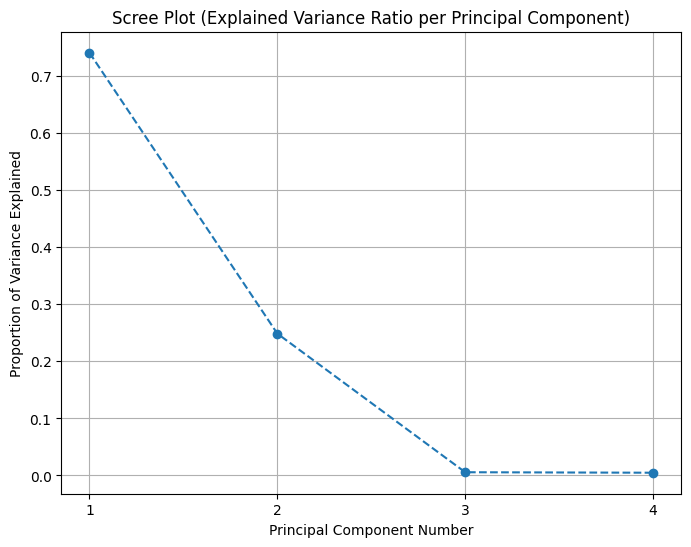

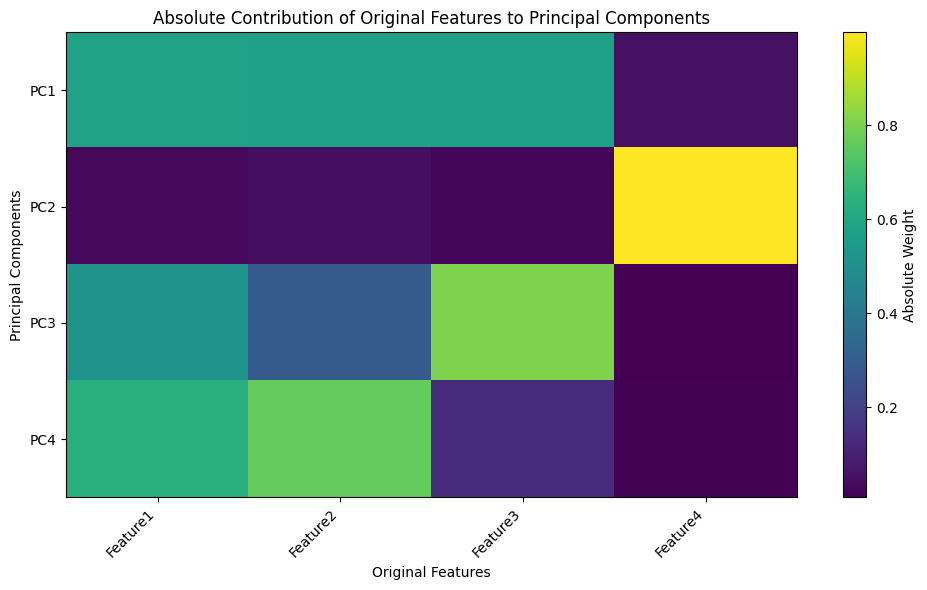

In [206]:
# Inisialisasi PCA tanpa menentukan n_components
pca = PCA() 
pca.fit(X)

# Menjelaskan varians yang dijelaskan oleh setiap komponen utama
print("Explained Variance Ratio (Proportion of Variance Explained by each PC):")
print(pca.explained_variance_ratio_)
print(f"Cumulative Explained Variance: {np.cumsum(pca.explained_variance_ratio_)}")

# Principal Components (Loadings/Kontribusi Fitur Asli)
print("\nPrincipal Components (Loadings/Weights of original features on each PC):")
# Untuk visualisasi lebih mudah, buat DataFrame
pc_df = pd.DataFrame(pca.components_, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pc_df)

# --- Visualisasi ---

# Plot Explained Variance Ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot (Explained Variance Ratio per Principal Component)')
plt.xlabel('Principal Component Number')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# Visualisasi kontribusi fitur pada PC
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(pc_df.abs(), cmap='viridis', aspect='auto')
plt.colorbar(heatmap, label='Absolute Weight')
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(pc_df.index)), pc_df.index)
plt.title('Absolute Contribution of Original Features to Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()

Explained Variance Ratio per Component:
Principal Component 1: 0.7408
Principal Component 2: 0.2486
Principal Component 3: 0.0057
Principal Component 4: 0.0048

Cumulative Explained Variance Ratio:
Principal Component 1: 0.7408
Principal Component 2: 0.9895
Principal Component 3: 0.9952
Principal Component 4: 1.0000


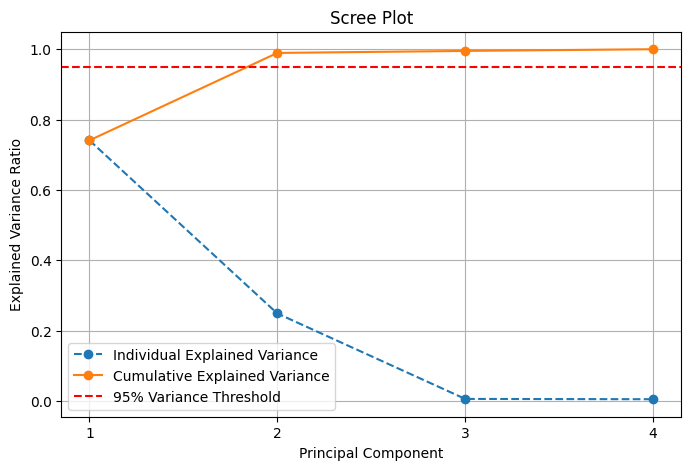

In [207]:
# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X)

# Menentukan kontribusi setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_  # Rasio variansi yang dijelaskan oleh setiap komponen utama
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)  # Variansi kumulatif

# Tampilkan kontribusi setiap komponen utama
print("Explained Variance Ratio per Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i + 1}: {ratio:.4f}")
# Tampilkan variansi kumulatif
print("\nCumulative Explained Variance Ratio:")
for i, ratio in enumerate(cumulative_variance_ratio):
    print(f"Principal Component {i + 1}: {ratio:.4f}")

# Membuat Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', label='Cumulative Explained Variance')
# Tambahkan garis horizontal pada Scree Plot
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid(True)
plt.show()

Silhouette Score: 0.5070064935941198


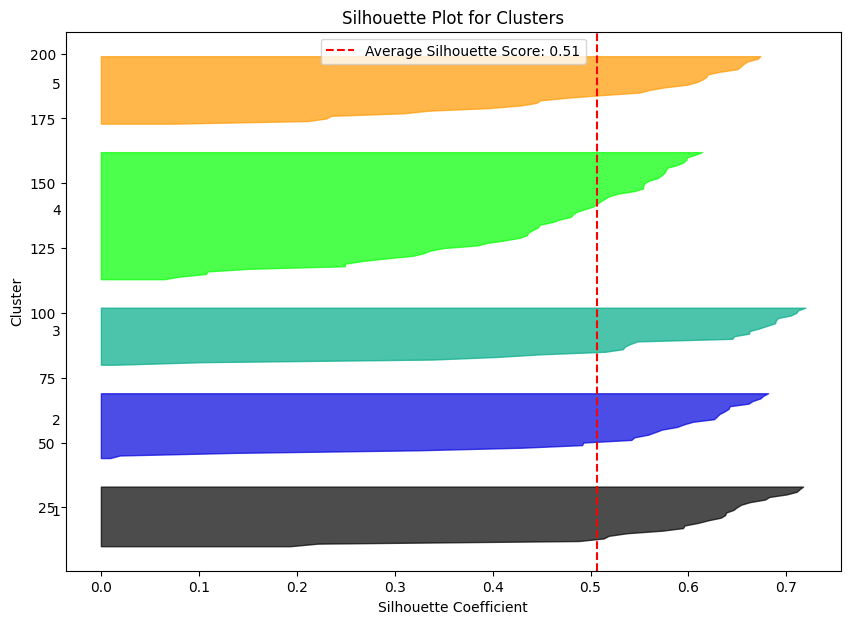

In [208]:
# Evaluasi dengan Silhouette Score
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Hitung nilai silhouette untuk setiap sampel
silhouette_values = silhouette_samples(X, labels)

# Plot Silhouette Score untuk setiap cluster
plt.figure(figsize=(10, 7))
y_lower = 10
for i in range(centroid_count):
    # Ambil nilai silhouette untuk cluster i
    cluster_silhouette_values = silhouette_values[labels == i]
    cluster_silhouette_values.sort()
    size_cluster_i = cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Pilih warna untuk cluster
    color = cm.nipy_spectral(float(i) / centroid_count)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Tambahkan label cluster
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
    y_lower = y_upper + 10  # Tambahkan jarak antar cluster

# Tambahkan garis rata-rata Silhouette Score
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Average Silhouette Score: {silhouette_avg:.2f}")
plt.title("Silhouette Plot for Clusters")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.legend()
plt.show()

# Silhouette Score memberikan nilai antara -1 dan 1:
# -Nilai mendekati 1 menunjukkan bahwa cluster terpisah dengan baik.
# -Nilai mendekati 0 menunjukkan bahwa cluster saling tumpang tindih.
# -Nilai negatif menunjukkan bahwa data mungkin salah dikelompokkan.

# Grafik berguna:
# -Untuk mengevaluasi cluster apakah memiliki bentuk yang jelas.
# -Memastikan tidak ada cluster dengan nilai silhouette negatif yang signifikan (indikasi salah clustering).

- Evaluasi dengan prediksi

In [209]:
import joblib

# Simpan model K-Means ke file
joblib.dump(kmeans, 'kmeans_model.pkl')
print("Model K-Means berhasil disimpan ke 'kmeans_model.pkl'")

Model K-Means berhasil disimpan ke 'kmeans_model.pkl'


In [210]:
# Menampilkan model K-Means dari file
loaded_model = joblib.load('kmeans_model.pkl')
print("Model K-Means berhasil dimuat.")


Model K-Means berhasil dimuat.


In [211]:
# Ambil 5 data dari dataset sebagai contoh untuk prediksi
new_data = df.iloc[:5].values
display(new_data)  

# cek data 1 sampai 5 berada pada cluster mana dari model
print("\nCek data 1 sampai 5 berada pada cluster mana:")
for i in range(5):
    print(f"Data {i+1} berada pada cluster: {labels[i]}")

# Prediksi cluster untuk data baru
predictions = loaded_model.predict(new_data)
print("\nHasil prediksi cluster untuk data 1 sampai 5:", predictions)



array([[ 2.24835708,  1.93086785,  2.32384427,  3.54605971],
       [ 1.88292331,  1.88293152,  2.78960641,  2.03486946],
       [ 1.76526281,  2.27128002,  1.76829115, -0.43145951],
       [ 2.12098114,  1.04335988,  1.13754108, -0.62457506],
       [ 1.49358444,  2.15712367,  1.54598796, -2.3246074 ]])


Cek data 1 sampai 5 berada pada cluster mana:
Data 1 berada pada cluster: 4
Data 2 berada pada cluster: 4
Data 3 berada pada cluster: 2
Data 4 berada pada cluster: 2
Data 5 berada pada cluster: 2

Hasil prediksi cluster untuk data 1 sampai 5: [5 5 2 2 8]


Prediksi cluster tidak sesuai, karena model clustering yang digunakan tidak dirancang untuk memprediksi data baru secara langsung. Algoritma seperti K-Means adalah algoritma unsupervised yang hanya mengelompokkan data berdasarkan pola dalam dataset yang diberikan saat pelatihan. Model digunakan hanya untuk cluster terhadap data yang ada. Bila untuk prediksi perlu menggunakan algoritma yang lain.

- Deployment

Analisa algoritma K-Mean telah dilakukan, deployment merupakan bagian akhir dari project ini, dihasilkan sebagai berikut:
1. Penentuan cluster untuk data baru dari dataset dihasilkan sebanyak 3 cluster
2. Penerapan Sebanyak 3 Clustering ke dalam sistem bisnis, sesuai dataset (Feature1, Feature2, Feature3 dan Feature4)
3. Visualisasi cluster dapat digunakan sebagai informasi penyajian mendukung keputusan.
